<a href="https://colab.research.google.com/github/michelepignatari/Machine_Learning/blob/master/KNN_x_ArvoreDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#Importar Bibliotecas
import pylab as pl #utilizado para plotar gráficos
import pandas as pd #utilizado para obter o dataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #função que realiza a divisão do dataset
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler #utilizado para normalização dos dados
from sklearn.neighbors import KNeighborsClassifier #utilizado para o modelo preditivo KNN
from sklearn.metrics import classification_report, confusion_matrix #utilizado para comparar os modelos de treino e teste
from mlxtend.plotting import plot_confusion_matrix #utilizado para plotagem da matriz de confusão

In [27]:
#Converter o Banco de Dados iris para o DataFrame
df_iris = pd.DataFrame(data=np.c_[iris['data'],iris['target']], #features são os atributos que definem as classificações da planta
                       columns=iris['feature_names']+['target']) #target é a classe a qual a planta pertence
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2     0.0
1                4.9               3.0  ...               0.2     0.0
2                4.7               3.2  ...               0.2     0.0
3                4.6               3.1  ...               0.2     0.0
4                5.0               3.6  ...               0.2     0.0

[5 rows x 5 columns]


In [41]:
#Transformar os Dados em Array
x = df_iris.iloc[:,:-1].values #dados de entrada
y = df_iris.iloc[:, 4].values #última coluna, que corresponde à classe da planta

In [55]:
#Realizar a divisão dos dados entre treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.20)

In [56]:
#Normalizar os dados, utilizando funções de pré-processamento
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
scaler.fit(x_treino) #fit: Compute the mean and std to be used for later scaling.

x_treino = scaler.transform(x_treino) #Transform: Perform standardization by centering and scaling
x_teste = scaler.transform(x_teste)

In [57]:
#Treinar o modelo
classificador = KNeighborsClassifier(n_neighbors=5)
classificador.fit(x_treino, y_treino)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
#Prever o resultado
y_previsao = classificador.predict(x_teste)

In [59]:
#Contruir a matriz de confusão para comparar o modelo criado
print(confusion_matrix(y_teste, y_previsao)) #Compute confusion matrix to evaluate the accuracy of a classification.
print(classification_report(y_teste, y_previsao)) #Build a text report showing the main classification metrics

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      0.91      0.95        11
         2.0       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



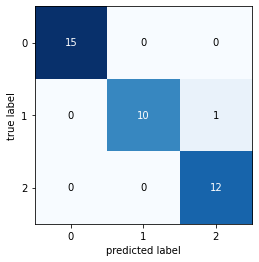

In [60]:
#Plotar a Matriz de Confusão em um gráfico
matriz_confusao = confusion_matrix(y_teste, y_previsao)
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()